In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
con = sqlite3.connect('../zippedData/im.db')

cursor_obj = con.cursor()

In [244]:

imbd_directors = pd.read_sql("""

SELECT mb.movie_id, mb.primary_title, mb.start_year, mb.runtime_minutes, mb.genres, 
    pr.person_id, pr.category, pr.job, p.primary_name, p.primary_profession

FROM 

    movie_basics as mb

    INNER JOIN
    movie_akas as ma
    ON mb.movie_id = ma.movie_id
    
    INNER JOIN
    directors as d
    ON mb.movie_id = d.movie_id

    INNER JOIN
    persons as p
    ON d.person_id = p.person_id
    
    INNER JOIN
    principals as pr
    ON mb.movie_id = pr.movie_id
    
WHERE ma.language IS ('en')

    
""", con)

In [245]:
imbd_directors

,movie_id,primary_title,start_year,runtime_minutes,genres,person_id,category,job,primary_name,primary_profession
0,tt10027708,Miguelito,2019,94.0,"Documentary,Music",nm10551197,self,None,Sam Zubrycki,"miscellaneous,editor,director"
1,tt10027708,Miguelito,2019,94.0,"Documentary,Music",nm10551198,cinematographer,None,Sam Zubrycki,"miscellaneous,editor,director"
2,tt10027708,Miguelito,2019,94.0,"Documentary,Music",nm10664910,self,None,Sam Zubrycki,"miscellaneous,editor,director"
3,tt10027708,Miguelito,2019,94.0,"Documentary,Music",nm10664911,self,None,Sam Zubrycki,"miscellaneous,editor,director"
4,tt10027708,Miguelito,2019,94.0,"Documentary,Music",nm10664917,actor,None,Sam Zubrycki,"miscellaneous,editor,director"
...,...,...,...,...,...,...,...,...,...,...
510055,tt9880178,The Attention,2019,61.0,Documentary,nm7461083,self,None,Orencio Carvajal,"miscellaneous,director,assistant_director"
510056,tt9880178,The Attention,2019,61.0,Documentary,nm8533504,self,None,Orencio Carvajal,"miscellaneous,director,assistant_director"
510057,tt9880178,The Attention,2019,61.0,Documentary,nm8895948,self,None,Orencio Carvajal,"miscellaneous,director,assistant_director"
510058,tt9880178,The Attention,2019,61.0,Documentary,nm8895958,self,None,Orencio Carvajal,"miscellaneous,director,assistant_director"


In [253]:
imbd_directors[imbd_directors['job'] == 'producer']

,movie_id,primary_title,start_year,runtime_minutes,genres,person_id,category,job,primary_name,primary_profession
24,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0005387,producer,producer,Tim Burton,"producer,miscellaneous,director"
26,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0865189,producer,producer,Tim Burton,"producer,miscellaneous,director"
27,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0865297,producer,producer,Tim Burton,"producer,miscellaneous,director"
34,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0005387,producer,producer,Tim Burton,"producer,miscellaneous,director"
36,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0865189,producer,producer,Tim Burton,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...
509980,tt9356320,Second Star on the Right,2019,83.0,Comedy,nm10162110,producer,producer,Ruth Caudeli,"writer,director,producer"
510038,tt9657946,Homing,2019,90.0,Drama,nm3465928,producer,producer,Helvécio Marins Jr.,"director,writer,producer"
510040,tt9827784,Farewell Song,2019,116.0,"Music,Romance",nm0624375,producer,producer,Akihiko Shiota,"director,writer,miscellaneous"
510044,tt9827784,Farewell Song,2019,116.0,"Music,Romance",nm4151154,producer,producer,Akihiko Shiota,"director,writer,miscellaneous"


In [251]:
imbd_directors[imbd_directors['job'] == 'producer'].head(40)

,movie_id,primary_title,start_year,runtime_minutes,genres,person_id,category,job,primary_name,primary_profession
24,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0005387,producer,producer,Tim Burton,"producer,miscellaneous,director"
26,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0865189,producer,producer,Tim Burton,"producer,miscellaneous,director"
27,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0865297,producer,producer,Tim Burton,"producer,miscellaneous,director"
34,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0005387,producer,producer,Tim Burton,"producer,miscellaneous,director"
36,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0865189,producer,producer,Tim Burton,"producer,miscellaneous,director"
37,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0865297,producer,producer,Tim Burton,"producer,miscellaneous,director"
44,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0005387,producer,producer,Tim Burton,"producer,miscellaneous,director"
46,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0865189,producer,producer,Tim Burton,"producer,miscellaneous,director"
47,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0865297,producer,producer,Tim Burton,"producer,miscellaneous,director"
54,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0005387,producer,producer,Tim Burton,"producer,miscellaneous,director"


In [247]:
high_numvote = imbd_directors[imbd_directors['numvotes'] >= 10000]

KeyError: 'numvotes'

# IMBD Data


In [230]:
imbd = pd.read_sql("""

SELECT *

FROM 

    movie_basics as mb
    INNER JOIN
    movie_akas as ma
    ON mb.movie_id = ma.movie_id

    INNER JOIN
    movie_ratings as mr
    ON mb.movie_id = mr.movie_id
    
    INNER JOIN
    directors as d
    ON mb.movie_id = d.movie_id
    
    INNER JOIN
    principals as pr
    ON mb.movie_id = pr.movie_id
    
WHERE ma.language IS ('en')



""", con)

In [231]:
imbd.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id', 'ordering', 'title', 'region',
       'language', 'types', 'attributes', 'is_original_title', 'movie_id',
       'averagerating', 'numvotes', 'movie_id', 'person_id', 'movie_id',
       'ordering', 'person_id', 'category', 'job', 'characters'],
      dtype='object')

In [236]:
# Of English Language Movies

imbd['movie_id'].nunique()

movie_id    15471
movie_id    15471
movie_id    15471
movie_id    15471
movie_id    15471
dtype: int64

In [233]:
imbd['start_year'].value_counts()

2014    71424
2015    51059
2012    50481
2013    50266
2017    48596
2016    47969
2011    46163
2018    42326
2010    42111
2019    15507
Name: start_year, dtype: int64

In [237]:
imbd_high_votes = imbd[imbd['numvotes'] >= 10000]

In [239]:
imbd_high_votes['movie_id']

,movie_id,movie_id,movie_id,movie_id,movie_id
0,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759
1,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759
2,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759
3,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759
4,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759
...,...,...,...,...,...
464670,tt6139732,tt6139732,tt6139732,tt6139732,tt6139732
464671,tt6139732,tt6139732,tt6139732,tt6139732,tt6139732
464672,tt6139732,tt6139732,tt6139732,tt6139732,tt6139732
464673,tt6139732,tt6139732,tt6139732,tt6139732,tt6139732


In [238]:
imbd_high_votes['movie_id'].nunique()

movie_id    932
movie_id    932
movie_id    932
movie_id    932
movie_id    932
dtype: int64

In [ ]:
imbd_high_votes['directors'].nunique()

In [98]:
imbd

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,ordering,title,region,...,averagerating,numvotes,movie_id,person_id,movie_id,ordering,person_id,category,job,characters
0,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,...,6.5,358813,tt1014759,nm0000318,tt1014759,1,nm1985859,actress,None,"[""Alice Kingsleigh""]"
1,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,...,6.5,358813,tt1014759,nm0000318,tt1014759,2,nm0000136,actor,None,"[""Mad Hatter""]"
2,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,...,6.5,358813,tt1014759,nm0000318,tt1014759,3,nm0000307,actress,None,"[""Red Queen""]"
3,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,...,6.5,358813,tt1014759,nm0000318,tt1014759,4,nm0004266,actress,None,"[""White Queen""]"
4,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,...,6.5,358813,tt1014759,nm0000318,tt1014759,5,nm0000318,director,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465897,tt9827784,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",tt9827784,3,Farewell Song,XWW,...,7.7,6,tt9827784,nm0794048,tt9827784,6,nm0624375,producer,producer,None
465898,tt9827784,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",tt9827784,3,Farewell Song,XWW,...,7.7,6,tt9827784,nm0794048,tt9827784,7,nm4151154,producer,producer,None
465899,tt9827784,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",tt9827784,3,Farewell Song,XWW,...,7.7,6,tt9827784,nm0794048,tt9827784,8,nm3566386,cinematographer,None,None
465900,tt9827784,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",tt9827784,3,Farewell Song,XWW,...,7.7,6,tt9827784,nm0794048,tt9827784,9,nm1395952,actress,None,None


In [99]:
imbd_subgroup = imbd[['movie_id', 'primary_title', 'start_year', 'genres', 'runtime_minutes', 'language', 'numvotes', 'averagerating', 'person_id','category', 'job'  ]]

In [100]:
imbd_subgroup

,movie_id,movie_id,movie_id,movie_id,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,person_id,category,job
0,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,nm1985859,actress,None
1,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,nm0000136,actor,None
2,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,nm0000307,actress,None
3,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,nm0004266,actress,None
4,tt1014759,tt1014759,tt1014759,tt1014759,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,nm0000318,director,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465897,tt9827784,tt9827784,tt9827784,tt9827784,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,nm0624375,producer,producer
465898,tt9827784,tt9827784,tt9827784,tt9827784,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,nm4151154,producer,producer
465899,tt9827784,tt9827784,tt9827784,tt9827784,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,nm3566386,cinematographer,None
465900,tt9827784,tt9827784,tt9827784,tt9827784,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,nm1395952,actress,None


In [101]:
imbd_subg = imbd_subgroup.loc[:,~imbd_subgroup.columns.duplicated()].copy()

In [102]:
imbd_subg.drop_duplicates()

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job
0,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None
1,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actor,None
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None
5,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,writer,screenplay
6,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,writer,"books ""Alice's Adventures in Wonderland"" and ""..."
...,...,...,...,...,...,...,...,...,...,...,...
465892,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,actress,None
465894,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,actor,None
465896,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,director,None
465897,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,producer,producer


In [112]:
imbd_subg

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job
0,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None
1,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actor,None
2,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None
3,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None
...,...,...,...,...,...,...,...,...,...,...,...
465897,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,producer,producer
465898,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,producer,producer
465899,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,cinematographer,None
465900,tt9827784,Farewell Song,2019,"Music,Romance",116.0,en,6,7.7,nm0794048,actress,None


In [115]:
imbd_people = pd.read_sql("""

SELECT *

FROM persons


""", con)

In [114]:
imbd_people

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [207]:
imbd_movie_people = pd.merge(imbd_subg, imbd_people, on='person_id', how='inner')

In [217]:
imbd_movie_people

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job,primary_name,birth_year,death_year,primary_profession
0,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
1,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actor,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
2,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
3,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465877,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,writer,co-writer,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465878,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,cinematographer,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465879,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,self,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465880,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,self,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"


In [208]:
imbd_movie_people['category'].unique()

array(['actress', 'actor', 'director', 'writer', 'producer', 'composer',
       'cinematographer', 'editor', 'production_designer', 'self',
       'archive_footage', 'archive_sound'], dtype=object)

In [209]:
directors = imbd_movie_people[imbd_movie_people['category'] == 'director']

In [210]:
directors = directors.drop_duplicates()

In [229]:
directors['person_id'].nunique()

789

In [214]:
directors = directors[directors['numvotes'] > 10000]

In [227]:
#directors.sort_values(by = 'averagerating', ascending = False)

In [228]:
directors

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job,primary_name,birth_year,death_year,primary_profession
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
44,tt3861390,Dumbo,2019,"Adventure,Family,Fantasy",112.0,en,25072,6.6,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
144,tt1263750,Room in Rome,2010,"Drama,Romance",107.0,en,20455,6.2,nm0575523,director,None,Julio Medem,1958.0,NaN,"director,writer,editor"
564,tt1305797,Enthiran,2010,"Action,Sci-Fi",155.0,en,23102,7.1,nm0788171,director,None,S. Shankar,NaN,NaN,"writer,director,producer"
604,tt2180477,Nanban,2012,"Comedy,Drama",188.0,en,10512,7.5,nm0788171,director,None,S. Shankar,NaN,NaN,"writer,director,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463669,tt6742252,The Guilty,2018,"Crime,Drama,Thriller",85.0,en,25267,7.5,nm7546166,director,None,Gustav Möller,NaN,NaN,"director,writer,actor"
463737,tt7451284,Batman Ninja,2018,"Action,Animation",85.0,en,13943,5.6,nm2459558,director,None,Junpei Mizusaki,NaN,NaN,"animation_department,director,visual_effects"
464550,tt4633694,Spider-Man: Into the Spider-Verse,2018,"Action,Adventure,Animation",117.0,en,210869,8.5,nm0709056,director,None,Peter Ramsey,NaN,NaN,"art_department,actor,assistant_director"
464570,tt4633694,Spider-Man: Into the Spider-Verse,2018,"Action,Adventure,Animation",117.0,en,210869,8.5,nm0745247,director,None,Rodney Rothman,NaN,NaN,"writer,producer,director"


In [226]:
directors.to_pickle("./directors.pkl")

In [43]:
#imbd_subgroup.drop.(columns = ['movie_id'])

imbd_subgroup.drop([0], axis=1)


KeyError: '[0] not found in axis'

In [43]:
#imbd_subgroup.drop.(columns = ['movie_id'])

imbd_subgroup.drop([0], axis=1)


KeyError: '[0] not found in axis'

In [43]:
#imbd_subgroup.drop.(columns = ['movie_id'])

imbd_subgroup.drop([0], axis=1)


KeyError: '[0] not found in axis'

In [180]:
imbd_movie_people['genres']

KeyError: 'genres'

In [122]:
imbd_movie_people.head()

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job,primary_name,birth_year,death_year,primary_profession
0,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
1,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actor,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
2,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
3,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"


In [123]:
imbd_movie_people.drop_duplicates()

,movie_id,primary_title,start_year,genres,runtime_minutes,language,numvotes,averagerating,person_id,category,job,primary_name,birth_year,death_year,primary_profession
0,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actress,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
1,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,actor,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
4,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,director,None,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
5,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,writer,screenplay,Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
6,tt1014759,Alice in Wonderland,2010,"Adventure,Family,Fantasy",108.0,en,358813,6.5,nm0000318,writer,"books ""Alice's Adventures in Wonderland"" and ""...",Tim Burton,1958.0,NaN,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465862,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,self,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465864,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,actor,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465866,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,director,None,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"
465867,tt9644084,Der Atem,2019,Documentary,95.0,en,5,5.2,nm0778308,writer,co-writer,Uli M. Schüppel,1958.0,NaN,"director,writer,producer"


In [186]:
directors = imbd_movie_people[imbd_movie_people['category'] == 'director'].drop_duplicates()

In [187]:
directors

,movie_id,primary_title,person_id,category,job,primary_name,primary_profession
4,tt1014759,Alice in Wonderland,nm0000318,director,None,Tim Burton,"producer,miscellaneous,director"
44,tt3861390,Dumbo,nm0000318,director,None,Tim Burton,"producer,miscellaneous,director"
104,tt1182315,Dark Buenos Aires,nm1413776,director,None,Ramon Térmens,"producer,writer,director"
124,tt1233259,Captain Thunder,nm0379872,director,None,Antonio Hernández,"producer,director,writer"
144,tt1263750,Room in Rome,nm0575523,director,None,Julio Medem,"director,writer,editor"
...,...,...,...,...,...,...,...
465720,tt8976472,Never Again,nm2791866,director,None,Aino Suni,"assistant_director,director,writer"
465734,tt8997034,Kleine Germanen - Eine Kindheit in der rechten...,nm0267945,director,None,Mohammad Farokhmanesh,"producer,director,writer"
465782,tt8997034,Kleine Germanen - Eine Kindheit in der rechten...,nm0311902,director,None,Frank Geiger,"producer,editor,writer"
465839,tt9094980,Water Lilies of Monet - The Magic of Water and...,nm2859134,director,None,Giovanni Troilo,"director,cinematographer,writer"


In [167]:
imbd_movie_people = imbd_movie_people[['movie_id', 'primary_title', 'person_id', 'category', 'job', 'primary_name', 'primary_profession']]

In [181]:
imbd_movie_people

,movie_id,primary_title,person_id,category,job,primary_name,primary_profession
0,tt1014759,Alice in Wonderland,nm0000318,actress,None,Tim Burton,"producer,miscellaneous,director"
1,tt1014759,Alice in Wonderland,nm0000318,actor,None,Tim Burton,"producer,miscellaneous,director"
2,tt1014759,Alice in Wonderland,nm0000318,actress,None,Tim Burton,"producer,miscellaneous,director"
3,tt1014759,Alice in Wonderland,nm0000318,actress,None,Tim Burton,"producer,miscellaneous,director"
4,tt1014759,Alice in Wonderland,nm0000318,director,None,Tim Burton,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...
465877,tt9644084,Der Atem,nm0778308,writer,co-writer,Uli M. Schüppel,"director,writer,producer"
465878,tt9644084,Der Atem,nm0778308,cinematographer,None,Uli M. Schüppel,"director,writer,producer"
465879,tt9644084,Der Atem,nm0778308,self,None,Uli M. Schüppel,"director,writer,producer"
465880,tt9644084,Der Atem,nm0778308,self,None,Uli M. Schüppel,"director,writer,producer"


In [178]:
imbd_movie_act_direct = imbd_movie_people[(imbd_movie_people['category'] == ['actress'] |imbd_movie_people['category'] == ['director'] |, , ''])]

ValueError: ('Lengths must match to compare', (465882,), (3,))

In [163]:
imbd_movie_people = imbd_movie_people.loc[imbd_movie_people['movie_id', 'primary_title', 'person_id', 'category', 'job', 'primary_name', 'primary_profession']]

KeyError: ('movie_id', 'primary_title', 'person_id', 'category', 'job', 'primary_name', 'primary_profession')

In [125]:
imbd_movie_people_sig = imbd_movie_people[imbd_movie_people['numvotes'] > 1000]

In [130]:
imbd_movie_people_sig = imbd_movie_people_sig.drop(columns = ['birth_year', 'death_year'])

In [149]:
genres = list(imbd_movie_people_sig['genres'].str.split(','))

In [158]:
genres[0:1000]

[['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Family', 'Fantasy'],
 

In [159]:
gen = []
for x in genres:
    for i in range(len(x)):
        if x[i] not in gen:
            gen.append(x)
gen

KeyboardInterrupt: 

In [138]:
gen = []

for i in genres:
    if i 
    
gen.append(x) if x not in gen for x in genres

SyntaxError: invalid syntax (<ipython-input-138-a0fb27e82bb5>, line 3)

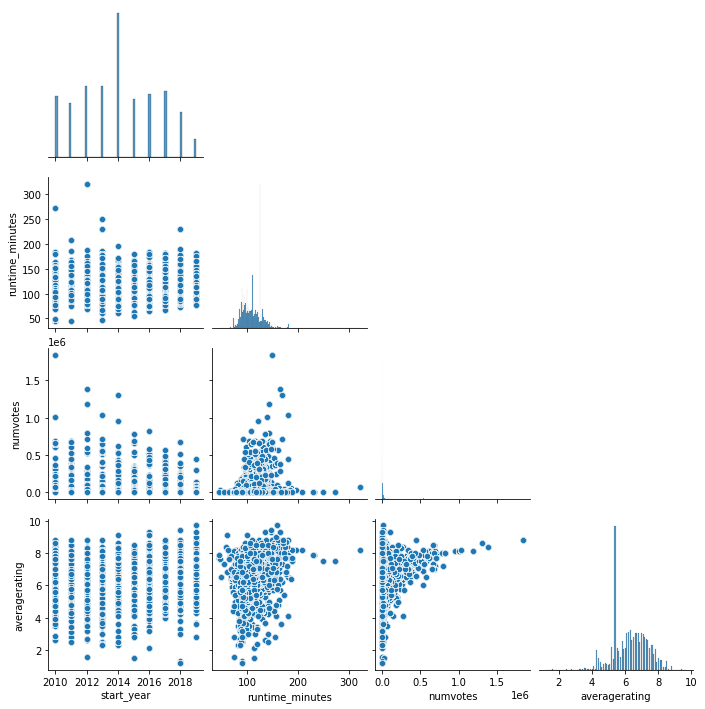

In [131]:
sns.pairplot(imbd_movie_people_sig, corner = True)
plt.show()

In [68]:
imbd_subgroup = imbd_subgroup.drop(imbd_subgroup.columns[[0, 1, 2]],axis = 1)

In [3]:
%%bash

sqlite3 '../zippedData/im.db'
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [4]:
imbd_movie_akas = pd.read_sql("""

SELECT *
FROM movie_akas


""", con)

In [6]:
imbd_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


# TN Movie Budges File as df_tn

In [10]:
df_tn = pd.read_csv('../zippedData/tn.movie_budgets.csv')

In [12]:
df_tn.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


# df_tmbd Movies File

In [8]:
df_tmbd = pd.read_csv('../zippedData/tmdb.movies.csv')


In [9]:
df_tmbd.head(25)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [15]:
df_tn = pd.read_csv('../zippedData/tn.movie_budgets.csv')

In [17]:
df_tn.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"
